In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/drive/My Drive/A.I/udemy machine learning/regresion lineal/Advertising.csv")

In [77]:
#gasto de publicidad en tv, radio y perdiociso para un producto en general y resultado de ventas
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
len(data)

200

In [0]:
#hallar correlacion entre variables predictoras

#la covarianza indica el sentido de la correlacion entre 2 variables de un 
#estudio bidimensional
#resultado positivo relacion directa
#resultado negativo relacion inversa


import numpy as np

**cov(X, Y)** = ((x – mean(X)) * (y – mean(Y)) 

ri3 = ri.loc[:,['search_conducted']]
ri3['sexbool'] = ri.driver_gender == 'M'
ri3.corr()

In [0]:
#correlation de la TV con variable predictora sales
data["Corr"] = (data["TV"] - np.mean(data["TV"])) * (data["Sales"] - np.mean(data["Sales"]))

In [49]:
data.head()

,TV,Radio,Newspaper,Sales,Corr
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [0]:
#correlacion TV 
data["corrTV"] = (data["TV"] - np.mean(data["TV"]))**2

In [51]:
data.head()

,TV,Radio,Newspaper,Sales,Corr,corrTV
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [0]:
#correlacion Sales
data["corrSales"] = (data["Sales"] - np.mean(data["Sales"]))**2

In [53]:
data.head()

,TV,Radio,Newspaper,Sales,Corr,corrTV,corrSales
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [0]:
#correlacion de pearson
corr_pearson = sum(data["Corr"]) / np.sqrt(sum(data["corrTV"]) * sum(data["corrSales"]))

In [55]:
corr_pearson

0.782224424861606

**El valor es 0.78, se acerca a uno y es positiva, entre mas se gasta en television(TV) mas aumentan las ventas(Sales)**



funcion para hallar coeficiente de correlacion donde le pso 3 variables el daraframe, variable 1 y variable2

In [0]:
def corr_coeff(df, var1, var2):
  df["correlation"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
  df["corr_1"] = (df[var1] - np.mean(df[var1]))**2
  df["corr_2"] = (df[var2] - np.mean(df[var2]))**2
  corr_p = sum(df["correlation"]) / np.sqrt(sum(df["corr_1"]) * sum(df["corr_2"]))
  return corr_p

In [59]:
#Con la television la correlacion se acerca a 1
corr_coeff(data, "TV", "Sales")

0.782224424861606

In [65]:
#con el periodico se acerca a 0
corr_coeff(data, "Newspaper", "Sales")

0.22829902637616525

In [66]:
#con la radio esta en la mitad de 0 y 1
corr_coeff(data, "Radio", "Sales")

0.5762225745710553

In [0]:
#la funcion retorna le mismo valor obtenido antes, lo cual muestra que esta bien

In [61]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Corr', 'corrTV', 'corrSales',
       'correlation', 'corr_1', 'corr_2'],
      dtype='object')

In [78]:
#volver a ejecutar el pd.csv para trabajar con las columnas originales del dataframe
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
#ver la correlacion de todas las columnas en un Time comolexcity O(n^2)
col = data.columns.values

In [82]:
for k in col:
  for i in col:
    print(k,"--->",i,"=", corr_coeff(data,k,i))

TV ---> TV = 1.0
TV ---> Radio = 0.05480866446583009
TV ---> Newspaper = 0.056647874965056993
TV ---> Sales = 0.782224424861606
Radio ---> TV = 0.05480866446583009
Radio ---> Radio = 1.0
Radio ---> Newspaper = 0.3541037507611752
Radio ---> Sales = 0.5762225745710553
Newspaper ---> TV = 0.056647874965056993
Newspaper ---> Radio = 0.3541037507611752
Newspaper ---> Newspaper = 1.0
Newspaper ---> Sales = 0.22829902637616525
Sales ---> TV = 0.782224424861606
Sales ---> Radio = 0.5762225745710553
Sales ---> Newspaper = 0.22829902637616525
Sales ---> Sales = 1.0


In [0]:
#plotting the data
%matplotlib inline
import matplotlib.pyplot as plt

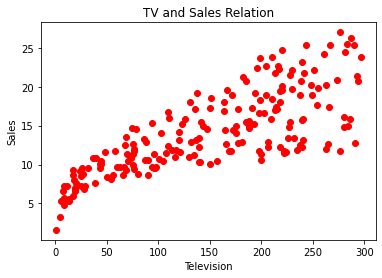

In [97]:
plt.plot(data["TV"], data["Sales"], "ro")
plt.title("TV and Sales Relation")
plt.xlabel("Television")
plt.ylabel("Sales")
plt.show()

Text(0.5, 1.0, 'Radio and Sales Relation')

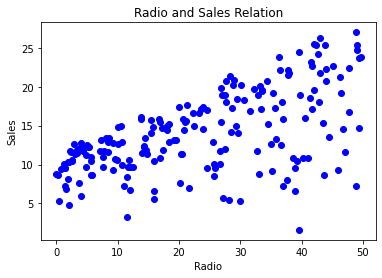

In [98]:
plt.plot(data["Radio"], data["Sales"], "bo")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio and Sales Relation")

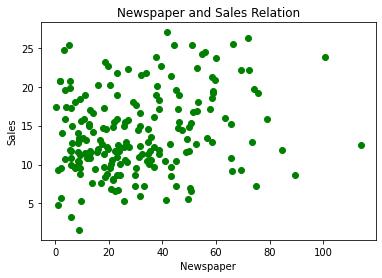

In [99]:
plt.plot(data["Newspaper"],data["Sales"], "go")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper and Sales Relation")
plt.show()

In [101]:
#Pandas incorpora una metodo para medir la correlacion de variables
data = pd.read_csv("/content/drive/My Drive/A.I/udemy machine learning/regresion lineal/Advertising.csv")
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


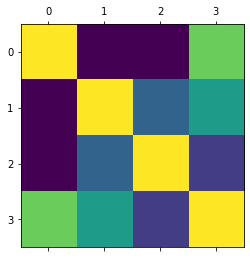

In [104]:
#para mostrar la matriz de correlacion con lalibreria matolotlib
plt.matshow(data.corr())